# Полиномиальная регрессия данных с отрицательными значениями

### библиотеки:

In [1]:
import datetime
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
from numpy import exp,sqrt
from scipy.stats import norm
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
import missingno as mno
from sklearn import linear_model

 ### данные с пропусками

In [2]:
df = pd.read_csv('C:/pythonushka/missing_negative_value.csv')

#length_colulmn = len(df)
#
#for i in range(1,length_colulmn):
#    if df['value'].iloc[i]-df['value'].iloc[i-1] <0:
#        df['value'].iloc[i] = df['value'].iloc[i-1]
#    elif data['value2'].iloc[i]-data['value2'].iloc[i+1] <0:
#        data['value2'].iloc[i] = data['value2'].iloc[i+1]   
#    else: 
#        df['value'].iloc[i] = df['value'].iloc[i]
data=df
print(df)
df.info()

            date       value
0     2018-01-01     784.288
1     2018-01-02         NaN
2     2018-01-03         NaN
3     2018-01-04         NaN
4     2018-01-05         NaN
...          ...         ...
1456  2021-12-27         NaN
1457  2021-12-28         NaN
1458  2021-12-29         NaN
1459  2021-12-30         NaN
1460  2021-12-31  659746.694

[1461 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1461 non-null   object 
 1   value   1094 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.0+ KB


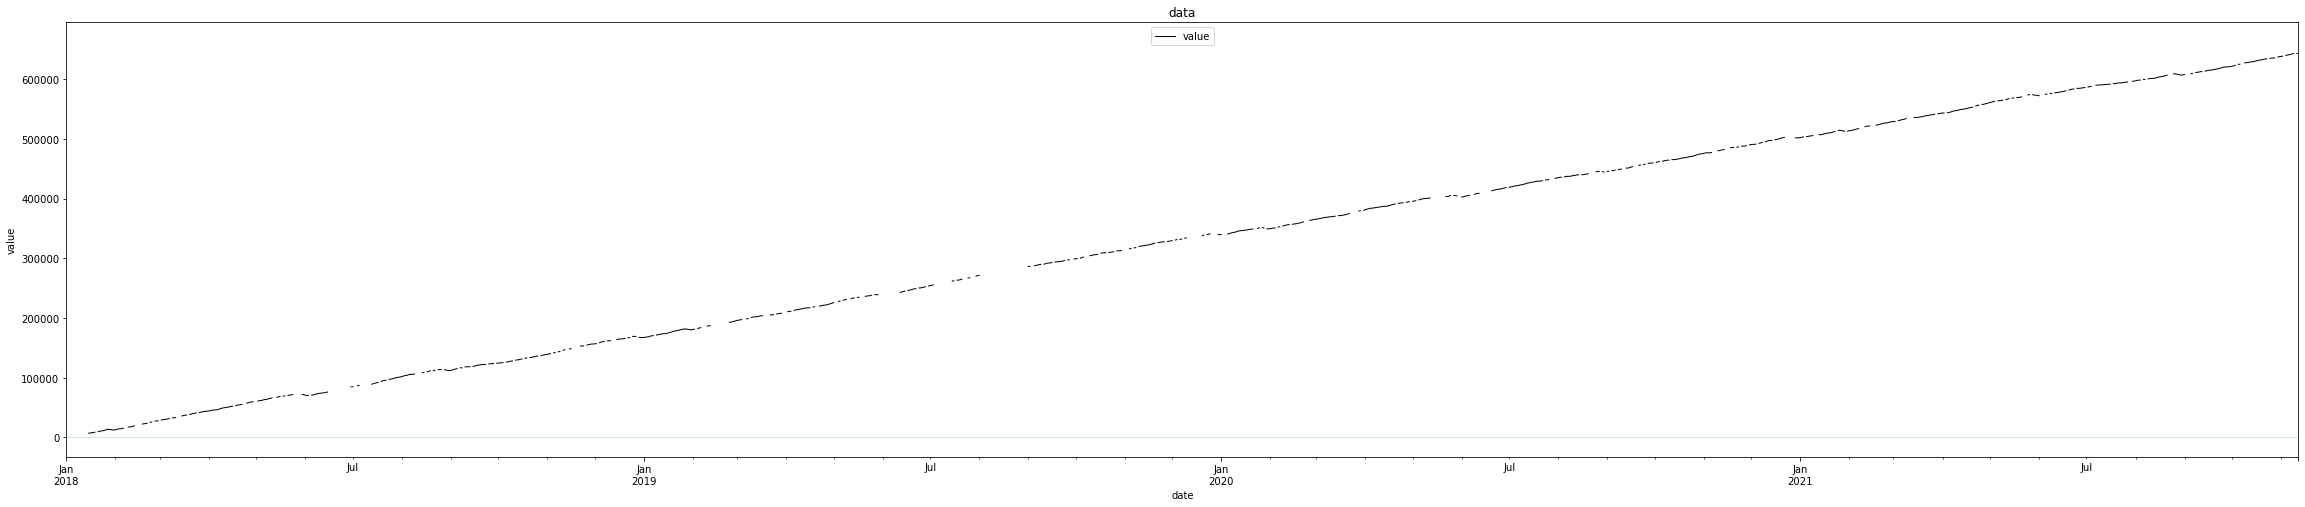

In [3]:
url = 'C:/pythonushka/missing_negative_value.csv'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',
                  infer_datetime_format=True,
                  squeeze=True)
 
ma = vix.rolling('1d').mean()
state = pd.cut(
    ma, bins=[-np.inf, 14, 18, 24, np.inf], labels=range(4)
)
 
ma.plot(
    color='black', linewidth=1, marker='', figsize=(40, 8)
)
 
ax = plt.gca()  # получаем текущий объект Axes, на который ссылается ma.plot()
ax.set_xlabel('date')
ax.set_ylabel('value')
ax.set_title('data')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-50])
 
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)

ax.fill_between(ma.index, 100, 400)
 
plt.show()

<AxesSubplot:xlabel='date'>

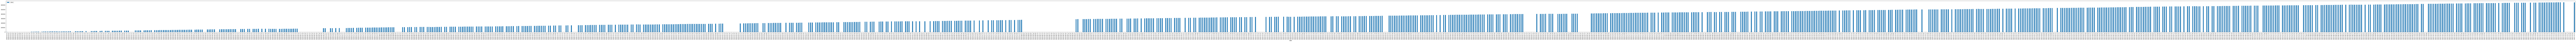

In [4]:
df.plot.bar(x='date', y='value', figsize=(400,5))

## интерполяция

            date          value
0     2018-01-01     784.288000
1     2018-01-02    1244.848214
2     2018-01-03    1705.408429
3     2018-01-04    2165.968643
4     2018-01-05    2626.528857
...          ...            ...
1456  2021-12-27  661319.266000
1457  2021-12-28  660926.123000
1458  2021-12-29  660532.980000
1459  2021-12-30  660139.837000
1460  2021-12-31  659746.694000

[1461 rows x 2 columns]
Настоящие значения, не превышающие предыдущих:
             date       value    delta
27    2018-01-28   13578.838 -179.683
28    2018-01-29   13266.594 -312.244
29    2018-01-30   12913.685 -352.909
30    2018-01-31   12456.661 -457.024
148   2018-05-29   73043.219 -819.328
...          ...         ...      ...
1456  2021-12-27  661319.266 -393.143
1457  2021-12-28  660926.123 -393.143
1458  2021-12-29  660532.980 -393.143
1459  2021-12-30  660139.837 -393.143
1460  2021-12-31  659746.694 -393.143

[70 rows x 3 columns]


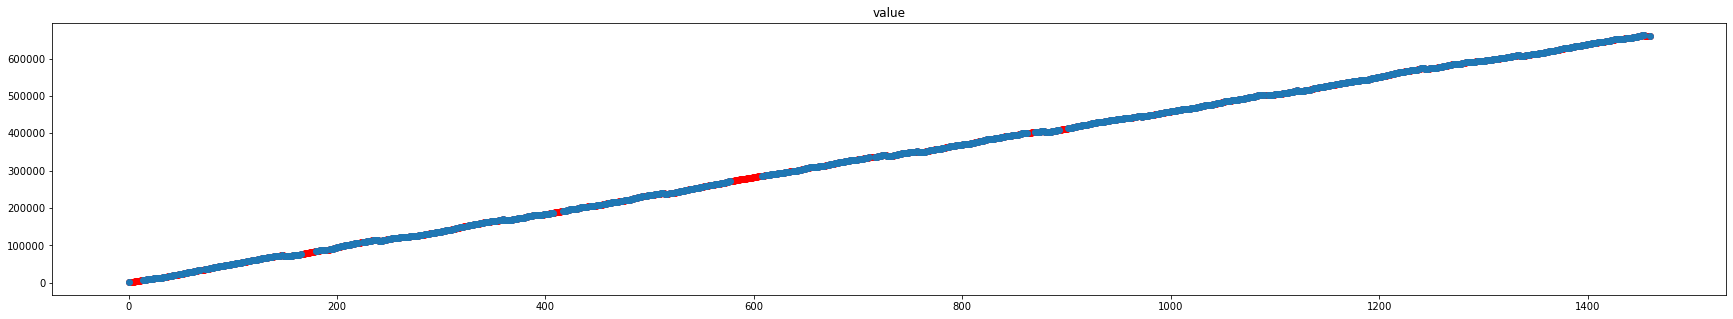

In [5]:
quadratic_imput=df.copy(deep=True)
quadratic_imput.interpolate(method='polynomial', order=1, inplace=True)
quadratic_imput['value'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))
df['value'].plot(title='value', marker='o', figsize=(30, 5))
print(quadratic_imput)

# Функция покажет если есть предыдущие значения больше последующих

quadratic_imput['delta'] = quadratic_imput['value'].T.diff().fillna(0).astype('float64')  
data_delta_age_negative = quadratic_imput [quadratic_imput ['delta'] <0]
print('Настоящие значения, не превышающие предыдущих:\n',data_delta_age_negative)

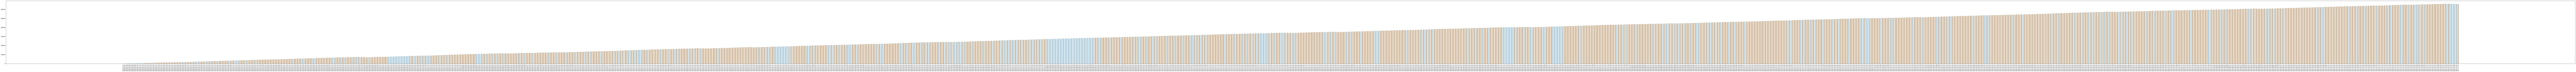

In [6]:
#missing = pd.read_csv('C:/pythonushka/my_new_file999.csv')

w=0.5
x = data['date']
value = quadratic_imput['value']
value2 = data['value']

#bar1 = np.arange(len(x))
#bar2 = [i+w for i in bar1]

plt.bar(x, value, w, alpha=0.5)
plt.bar(x, value2, w, alpha=0.5)

plt.gcf().set_size_inches(400, 10)
plt.xticks(x, rotation = 90)
plt.show()


C:\Python\Anaconda3.8\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


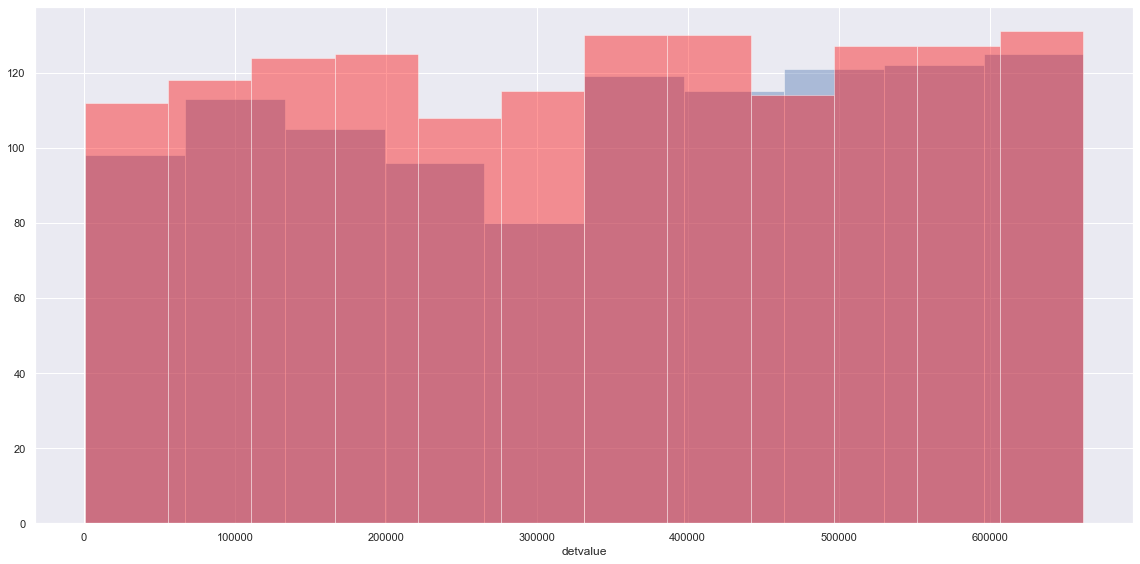

In [7]:
df['detvalue'] = quadratic_imput.value
sns.set()
fig, axes = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(16, 8)
sns.distplot(data["value"].dropna(), kde = False)
sns.distplot(df['detvalue'], kde = False, color = 'red')
    
plt.tight_layout()

In [8]:
df['detvalue'] = quadratic_imput.value
pd.concat([data[["value"]], df[["detvalue"]]], axis = 1).describe().T

count           mean            std      min           25%  \
value     1094.0  346596.788061  193160.242945  784.288  171681.59025   
detvalue  1461.0  336674.241252  191883.410869  784.288  168596.59900   

                  50%           75%         max  
value     358651.4525  513830.56300  662105.552  
detvalue  340738.6275  503233.25175  662105.552

In [9]:
print(data["value"].std() - df["detvalue"].std())

1276.832076702849


# 1276.832076702849

# Стандартная ошибка (std)  хорошая


Мы можем представить себе этот факт разными способами. 
Первый - это построение гистограмм как для неполных, так и для полных данных, 
на которых мы можем заметить, что график полных данных выше и уже по сравнению с графиком неполных данных. 
Другими словами, полные данные имеют меньшее стандартное отклонение (следовательно, меньшую изменчивость), 
чем неполные данные. Другой метод - построить коробчатую диаграмму, 
на которой мы можем наблюдать, что диапазон IQ довольно сжат для полных данных по сравнению с таковым в неполных данных.

# ВЫВОДЫ:
Модель хорошо подходит для восстановления данных с линейной зависимостью. Модель хорошо справляется с даннными где большие пропуски и лучше если они еденичные. Так как полиномиальная модель не подходит для линейно зависимых значений, мы используем первый порядок, что говорит нам о том что интеполяция пройдет линейным способом, т.е. соединением двух точек между которыми пропуки. 

#### В модели будут встречаться значения превышающие последующие, это связано с тем, что в первоначальных  данных они пресудствовали, т.е. кто-то накручивал данные, что привело к таким последствиям, однако посредством разницы между тем сколько было и сколько стало можно как минимум высчитать примерное значение скаолько накрутили( отнять предшетствующее , которое больше и прибавить к нему среднюю за период, однако такой показатель не точный и он может привысить в некоторых случаях настоящее потребление, поэтому рекамедуется просто прировнять к предыдущему, которое было больше)